In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing as prep
import statistics as st
from sklearn.metrics import jaccard_score as js
from sklearn.metrics.pairwise import cosine_similarity as cns

In [50]:
data = pd.read_excel('/content/19CSE305_LabData_Set3.1.xlsx', sheet_name = 'thyroid0387_UCI')

In [51]:
print(data.dtypes)

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [52]:
data.replace('?', np.NaN, inplace=True)
data

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148.0,t,1.44,t,103.0,f,NaN,STMW,NO CONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,NaN,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,NaN,f,NaN,f,NaN,t,30.0,other,NO CONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201.0,t,0.84,t,240.0,f,NaN,SVI,AK


In [53]:
one_hot_encoding_columns = ['referral source', 'Condition']
label_encoding_columns= ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']
mode_columns = label_encoding_columns + one_hot_encoding_columns
for i in mode_columns:
    data[i] = data[i].fillna(data[i].mode()[0])

median_columns = ['TSH', 'T3', 'TT4', 'TT4', 'T4U', 'FTI', 'TBG']
for i in median_columns:
    data[i] = data[i].fillna(data[i].median())

data

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,103.0,f,0.96,f,106.0,f,25.5,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,0.96,f,106.0,f,25.5,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,103.0,f,0.96,f,106.0,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,103.0,f,0.96,f,106.0,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,103.0,f,0.96,f,106.0,t,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148.0,t,1.44,t,103.0,f,25.5,STMW,NO CONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,25.5,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,103.0,f,0.96,f,106.0,t,30.0,other,NO CONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201.0,t,0.84,t,240.0,f,25.5,SVI,AK


In [54]:
# label encoding schema
from sklearn import preprocessing as prepro
label_encoder = prepro.LabelEncoder()
for i in label_encoding_columns:
    data[i] = label_encoder.fit_transform(data[i])

# One hot encoding schema
referral_source = pd.get_dummies(data['referral source'])
condition=pd.get_dummies(data['Condition'])
data.drop(['referral source','Condition'],axis=1,inplace=True)
data=pd.concat([data,referral_source,condition],axis=1)


In [55]:
data

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,M,MI,MK,N,NO CONDITION,O,P,Q,R,S
0,840801013,29,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,840801014,29,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,840801042,41,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,840803046,36,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,840803047,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
996,841031010,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,841031030,20,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
998,841031031,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
TSH_values = data['TSH']
mean_TSH = np.nanmean(TSH_values)
print("The mean value of TSH readings is: ", mean_TSH, "\n")
variance_TSH = np.nanvar(TSH_values)
print("The variance value of TSH readings is: ", variance_TSH, "\n")

T3_values = data['T3']
mean_T3 = np.nanmean(T3_values)
print("The mean value of T3 readings is: ", mean_T3, "\n")
variance_T3 = np.nanvar(T3_values)
print("The variance value of T3 readings is: ", variance_T3, "\n")

TT4_values = data['TT4']
mean_TT4 = np.nanmean(TT4_values)
print("The mean value of TT4 readings is: ", mean_TT4, "\n")
variance_TT4 = np.nanvar(TT4_values)
print("The variance value of TT4 readings is: ", variance_TT4, "\n")

T4U_values = data['T4U']
mean_T4U = np.nanmean(T4U_values)
print("The mean value of T4U readings is: ", mean_T4U, "\n")
variance_T4U = np.nanvar(T4U_values)
print("The variance value of T4U readings is: ", variance_T4U, "\n")

FTI_values = data['FTI']
mean_FTI = np.nanmean(FTI_values)
print("The mean value of FTI readings is: ", mean_FTI, "\n")
variance_FTI = np.nanvar(FTI_values)
print("The variance value of FTI readings is: ", variance_FTI, "\n")

TBG_values = data['TBG']
mean_TBG = np.nanmean(TBG_values)
print("The mean value of TBG readings is: ", mean_TBG, "\n")
variance_TBG = np.nanvar(TSH_values)
print("The variance value of TBG readings is: ", variance_TBG, "\n")

The mean value of TSH readings is:  5.8972799909999996 

The variance value of TSH readings is:  768.342224901751 

The mean value of T3 readings is:  1.8177499990000001 

The variance value of T3 readings is:  0.518337423935501 

The mean value of TT4 readings is:  106.30980000000001 

The variance value of TT4 readings is:  1668.28154396 

The mean value of T4U readings is:  0.9708600000000002 

The variance value of T4U readings is:  0.038606860400000005 

The mean value of FTI readings is:  113.758 

The variance value of FTI readings is:  3460.382556 

The mean value of TBG readings is:  25.526299999 

The variance value of TBG readings is:  768.342224901751 



Text(0.5, -0.15, 'TSH values and outliers')

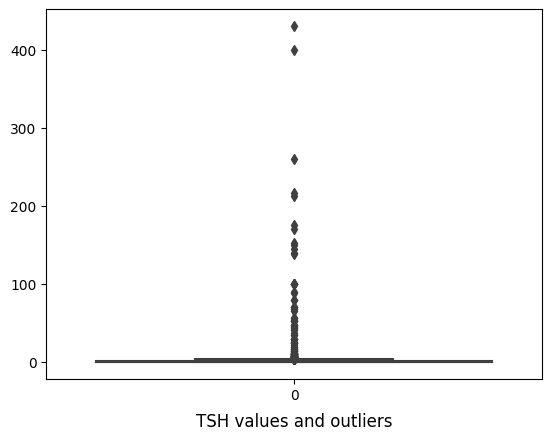

In [59]:
sns.boxplot(data['TSH'])
plt.title("TSH values and outliers", y = -0.15)

Text(0.5, -0.15, 'T3 values their outliers')

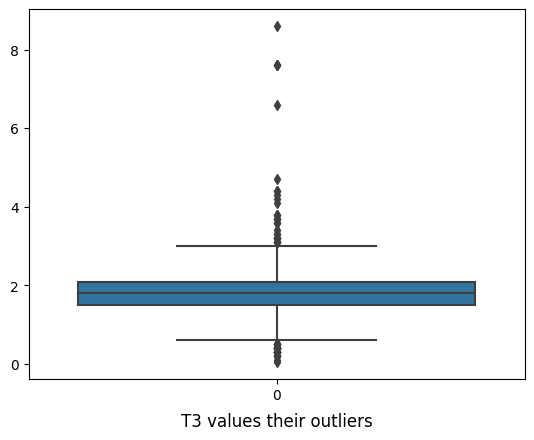

In [61]:
sns.boxplot(data['T3'])
plt.title("T3 values their outliers", y = -0.15)

Text(0.5, -0.15, 'TT4 values their outliers')

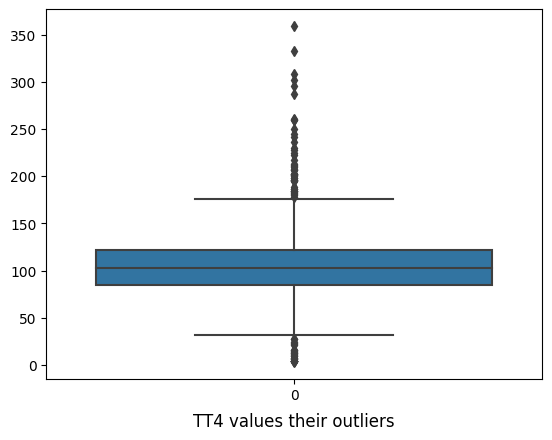

In [62]:
sns.boxplot(data['TT4'])
plt.title("TT4 values their outliers", y = -0.15)

Text(0.5, -0.15, 'T4U values their outliers')

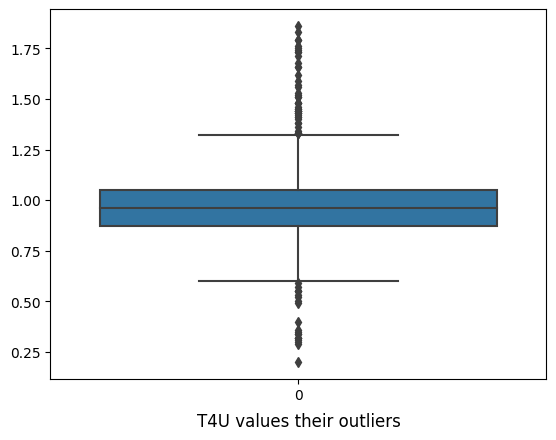

In [63]:
sns.boxplot(data['T4U'])
plt.title("T4U values their outliers", y = -0.15)

Text(0.5, -0.15, 'FTI values their outliers')

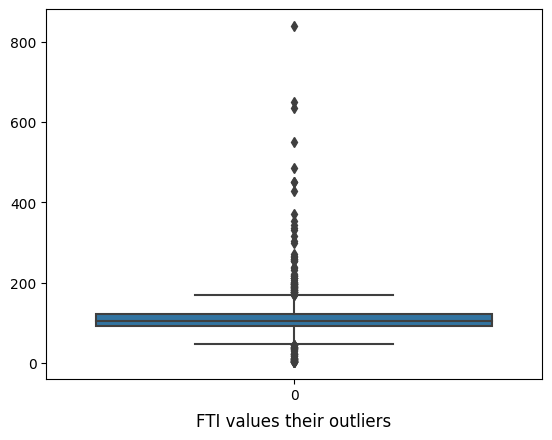

In [64]:
sns.boxplot(data['FTI'])
plt.title("FTI values their outliers", y = -0.15)

Text(0.5, -0.15, 'TBG values their outliers')

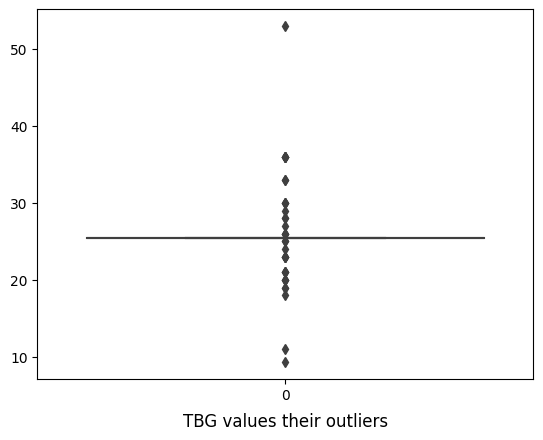

In [65]:
sns.boxplot(data['TBG'])
plt.title("TBG values their outliers", y = -0.15)

In [66]:
scaler = prep.MinMaxScaler()
scaled_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
data_copy = data
scaled_df = scaler.fit_transform(data_copy[scaled_columns])
scaled_df = pd.DataFrame(scaled_df, columns = scaled_columns)
for i in scaled_columns:
    data[i] = scaled_df[i]
data

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,M,MI,MK,N,NO CONDITION,O,P,Q,R,S
0,840801013,29,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,840801014,29,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,840801042,41,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,840803046,36,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,840803047,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
996,841031010,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,841031030,20,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
998,841031031,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


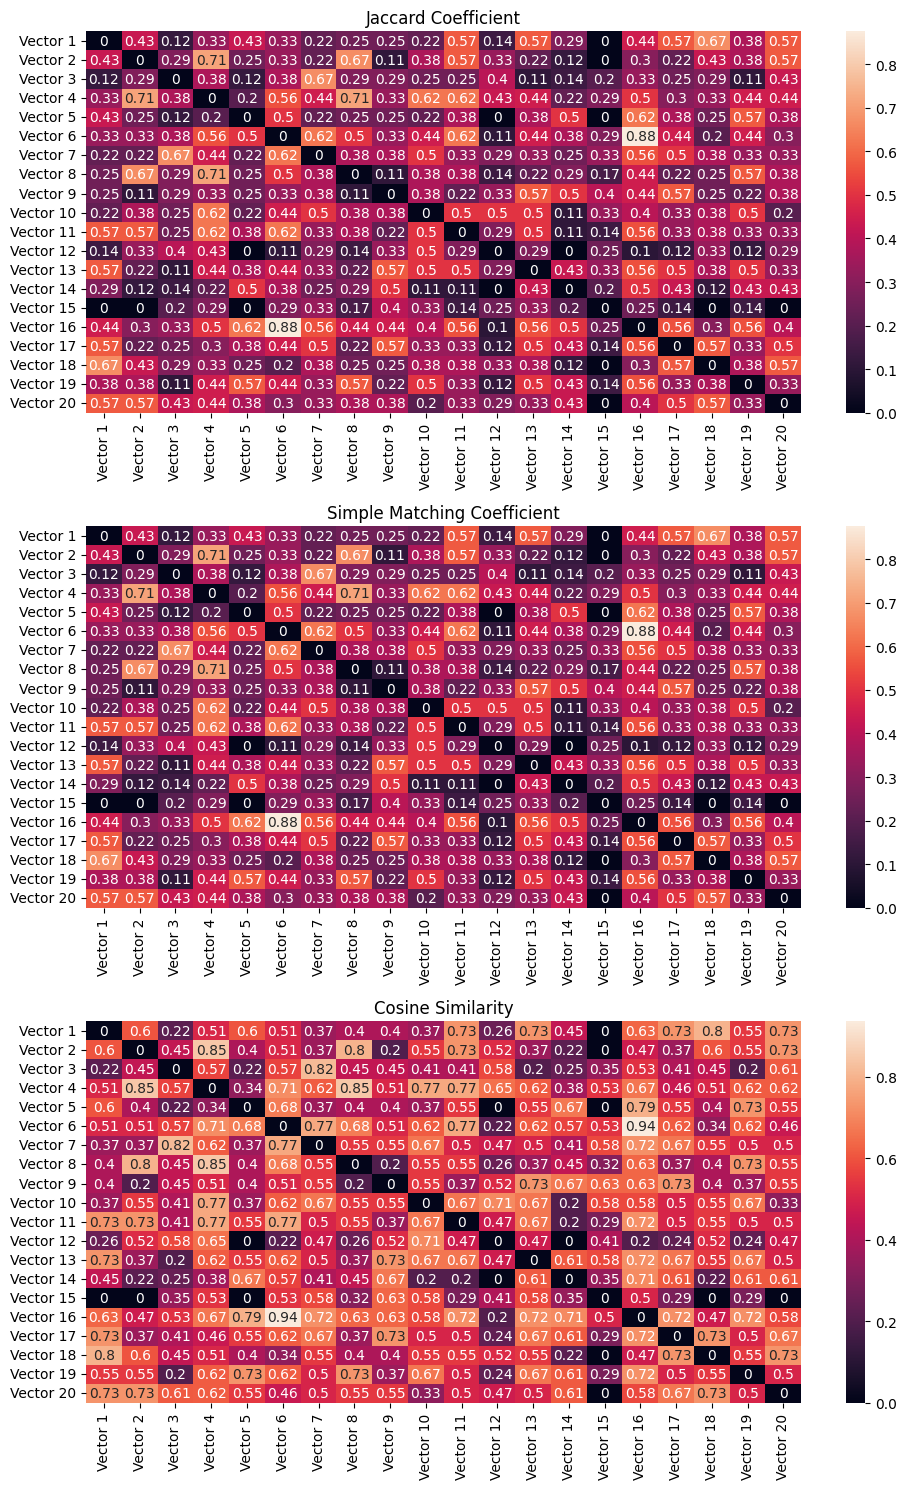

In [69]:
vectors = np.random.randint(2, size=(20, 10))
num_vectors = len(vectors)
jc_matrix = np.zeros((num_vectors, num_vectors))
smc_matrix = np.zeros((num_vectors, num_vectors))
cos_matrix = np.zeros((num_vectors, num_vectors))
for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j:
            jc_matrix[i, j] = js(vectors[i], vectors[j])
            smc_matrix[i, j] = np.sum(np.logical_and(vectors[i], vectors[j])) / np.sum(np.logical_or(vectors[i], vectors[j]))
            cos_matrix[i, j] = cns([vectors[i]], [vectors[j]])[0, 0]
labels = [f"Vector {i+1}" for i in range(num_vectors)]
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.heatmap(jc_matrix, annot=True, xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Jaccard Coefficient')
sns.heatmap(smc_matrix, annot=True, xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Simple Matching Coefficient')
sns.heatmap(cos_matrix, annot=True, xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title('Cosine Similarity')
plt.tight_layout()
plt.show()